# Food choices and preferences of college students

This dataset includes information on food choices, nutrition, preferences, childhood favorites, and other information from college students. There are 126 responses from students. Data is raw and uncleaned. Data comes from [kaggle](https://www.kaggle.com/borapajo/food-choices/data).<br>
Dataset was created to answer a few questions:<br>
    - How important is nutrition information for today's college kids?
    - Is their taste in food defined by their food preferences when they were children?
    - Are kids of parents who cook more likely to make better food choices than others?
    - Are these kids likely to have a different taste compared to others?
In this notebook we will try to predict if.<br>
<br>
**The main goals:**<br>
    - Data exploration/engineering/cleaning.
    - Visualization.
    - Select and train a ML model.
    - Parameters optimization.
    - Evaluation.
<br>
*Dataset can be used in natural language processing.

## Imported libraries

In [2]:
# Data engineering.
import pandas as pd
import numpy as np

# Regular expressions module.
import re

# Data visualization and frame's visualization options.
import missingno as msno # Copyright (c) 2016 Aleksey Bilogur
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [62]:
# Load data
df = pd.read_csv('food_coded.csv')

## Data exploration

In [63]:
# Check data frame's shape
df.shape

(125, 61)

In [64]:
df.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,eating_changes_coded1,eating_out,employment,ethnic_food,exercise,father_education,father_profession,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,fruit_day,grade_level,greek_food,healthy_feeling,healthy_meal,ideal_diet,ideal_diet_coded,income,indian_food,italian_food,life_rewarding,marital_status,meals_dinner_friend,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,2.0,9,NaN,eat good and exercise,1,1.0,eat faster,1,1,3,3.0,1,1.0,5.0,profesor,Arabic cuisine,3,1.0,rice and chicken,2,5,2,5,2,looks not oily,being healthy,8,5.0,5,5,1.0,1.0,"rice, chicken, soup",1.0,unemployed,5,1.0,1,2,5.0,3.0,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,3.0,1,1.0,I eat about three times a day with some snacks...,2,2.0,I eat out more than usual.,1,2,2,2.0,4,1.0,2.0,Self employed,Italian,1,1.0,"chicken and biscuits, beef soup, baked beans",1,4,4,4,5,"Grains, Veggies, (more of grains and veggies),...",Try to eat 5-6 small meals a day. While trying...,3,4.0,4,4,1.0,2.0,"Pasta, steak, chicken",4.0,Nurse RN,4,1.0,1,4,4.0,3.0,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,1.0,1,3.0,"toast and fruit for breakfast, salad for lunch...",3,1.0,sometimes choosing to eat fast food instead of...,1,3,2,3.0,5,2.0,2.0,owns business,italian,1,3.0,"mac and cheese, pizza, tacos",1,5,3,5,6,usually includes natural ingredients; nonproce...,i would say my ideal diet is my current diet,6,6.0,5,5,7.0,2.0,"chicken and rice with veggies, pasta, some kin...",2.0,owns business,4,2.0,1,3,5.0,6.0,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,2.0,2,2.0,"College diet, cheap and easy foods most nights...",2,2.0,Accepting cheap and premade/store bought foods,1,3,2,3.0,5,3.0,2.0,Mechanic,Turkish,3,1.0,"Beef stroganoff, tacos, pizza",2,4,4,5,7,"Fresh fruits& vegetables, organic meats","Healthy, fresh veggies/fruits & organic foods",2,6.0,5,5,2.0,2.0,Grilled chicken \rStuffed Shells\rHomemade Chili,4.0,Special Education Teacher,2,1.0,1,2,5.0,5.0,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,1.0,1,2.0,I try to eat healthy but often struggle becaus...,2,2.0,I have eaten generally the same foods but I do...,3,4,2,2.0,4,1.0,4.0,IT,Italian,1,3.0,"Pasta, chicken tender, pizza",1,4,4,4,6,"A lean protein such as grilled chicken, green ...",Ideally I would like to be able to eat healthi...,2,6.0,2,5,1.0,1.0,"Chicken Parmesan, Pulled Pork, Spaghetti and m...",5.0,Substance Abuse Conselor,3,1.0,1,4,2.0,4.0,1.0,1.0,4,940.0,500,Softball,4,2,760,190


In [65]:
# Data features
df.columns

Index(['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons',
       'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded.1',
       'cuisine', 'diet_current', 'diet_current_coded', 'drink',
       'eating_changes', 'eating_changes_coded', 'eating_changes_coded1',
       'eating_out', 'employment', 'ethnic_food', 'exercise',
       'father_education', 'father_profession', 'fav_cuisine',
       'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'mother_profession',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       

space for feature's comments

In [66]:
# Explore the dataset
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
GPA,123,38,3.5,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,125,NaN,NaN,NaN,1.392,0.490161,1,1,1,2,2
breakfast,125,NaN,NaN,NaN,1.112,0.316636,1,1,1,1,2
calories_chicken,125,NaN,NaN,NaN,577.32,131.214,265,430,610,720,720
calories_day,106,NaN,NaN,NaN,3.0283,0.639308,2,3,3,3,4
calories_scone,124,NaN,NaN,NaN,505.242,230.841,315,420,420,420,980
coffee,125,NaN,NaN,NaN,1.752,0.43359,1,2,2,2,2
comfort_food,124,124,"Mashed potatoes, pasta",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
comfort_food_reasons,124,107,boredom,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
comfort_food_reasons_coded,106,NaN,NaN,NaN,2.69811,1.97204,1,2,2,3,9


It's hard to read frames with that amount of features.<br>
<br>
First thing we can look at is count column. We can notice that there is some range of values. It means we have to deal with NaN values. Let's explore a data frame and visualize the distribution of missing values of inputs. We are going to use missingno module created by [Aleksey Bilogur](https://github.com/ResidentMario/missingno).

### Missing data

todo
- zmiana kolejnosci

In [67]:
# Check how many features have missing data
df.isnull().any().value_counts()

True     34
False    27
dtype: int64

We are going to create more detailed data frame with informations about missing values.

In [68]:
# Amount of NaN values for each feature
total = df.isnull().sum().sort_values(ascending=False)
# Percentage part of total
percent = (df.isnull().sum()/df.isnull().count()*100).round(1).sort_values(ascending=False)
# Merge series
nan_data = pd.concat({"# of NaN's": total, '% of Total': percent}, axis=1)
nan_data.head(10)

,# of NaN's,% of Total
type_sports,21,16.8
calories_day,19,15.2
comfort_food_reasons_coded,19,15.2
cuisine,17,13.6
exercise,13,10.4
employment,9,7.2
cook,3,2.4
eating_changes,3,2.4
father_profession,3,2.4
meals_dinner_friend,3,2.4


Let's plot missing values distribution. We are going to use these 34 True values above as indices in dataframe.columns .<br>
**Note:** Author of this module recommends to use max. 50 featuers at once in visualization.

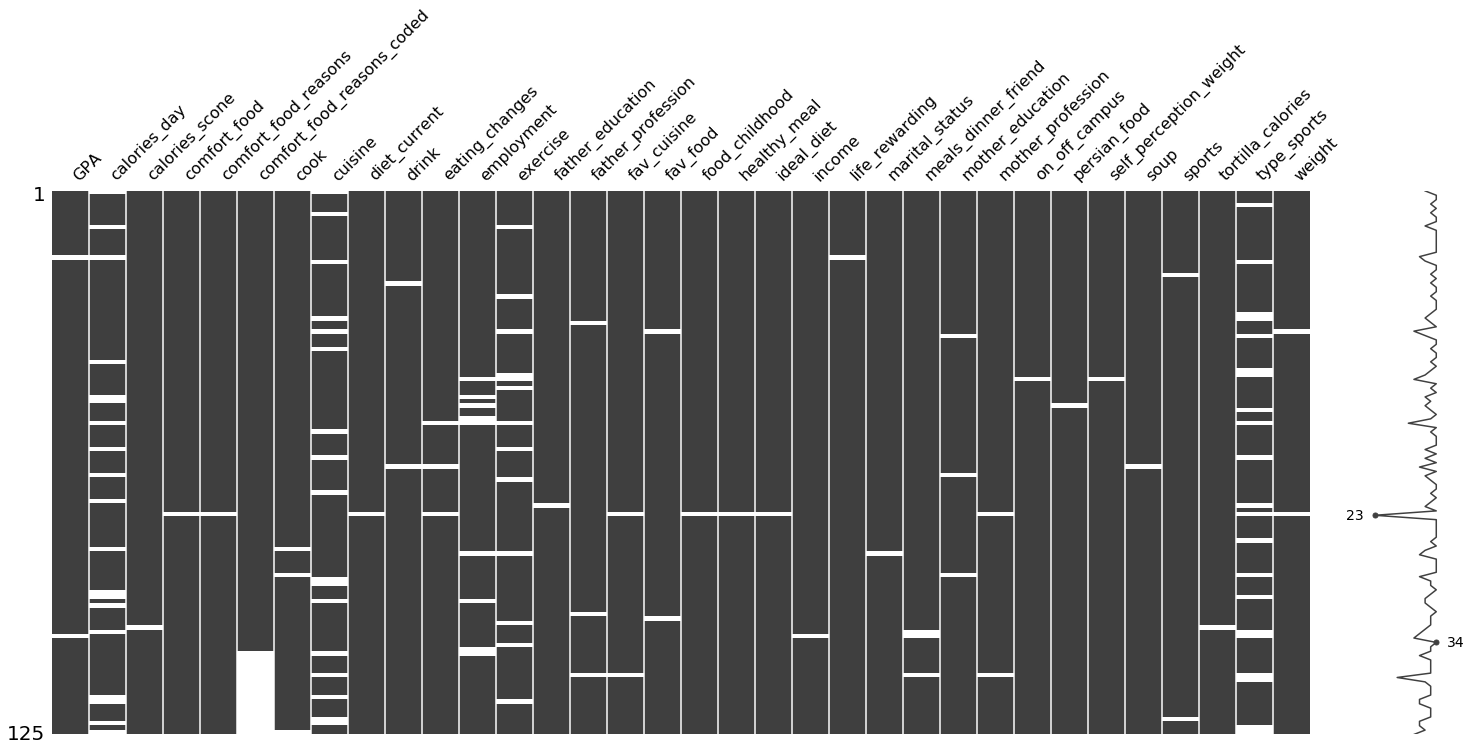

In [69]:
# Use missingno module for NaN's distribution
msno.matrix(df[df.columns[df.isnull().any()]])

Distribution of missing values across the dataset is pretty good with one exception. Feature called 'comfort_food_reasons_coded' has a significant gap at the end. I think it might be dangerous. Let's explore the importance of this feature.<br>
One more thing about this plot - on the right side we have specified rows with min. and max. amount of features that does not contain NaN's.<br>
<br>
When we look back at data frame we can notice a few related with each other features - **'comfort_food_reasons', 'comfort_food_reasons_coded', 'comfort_food_reasons_coded.1'.**<br>
It looks like comfort_food_reasons feature was converted to numerical values before. The third feature seems to be a copy of that we mentioned above. It does not appear on graph with missing values. Let's check if values of both do overlap.

In [70]:
(df['comfort_food_reasons_coded'] == df['comfort_food_reasons_coded.1']).value_counts()

True     105
False     20
dtype: int64

We can quickly check if the last 20 values are reasonable to the rest. Reasons like stress, boredom and sadness had 1-3 values. If there is  more unique reason then value goes higher. It looks ok for me.

In [71]:
df[['comfort_food_reasons', 'comfort_food_reasons_coded.1']].tail(20)

,comfort_food_reasons,comfort_food_reasons_coded.1
105,"Boredom, laziness, anger",2
106,Stress and sadness,1
107,"I am always stressed out, and bored when I am ...",1
108,"Stress, sadness, boredom",1
109,"Stress, frustration, self-consciousness",1
110,Sadness and cravings,3
111,boredom,2
112,"Sadness, happiness and boredom",3
113,Boredom and sadness,2
114,"sadness, happiness and hunger",3


That is confirmation of our assumption. We can drop both features -  **'comfort_food_reasons'** and **'comfort_food_reasons_coded'**.<br> The one we leave has no missing values. Let's rename it.

In [72]:
df.drop(['comfort_food_reasons', 'comfort_food_reasons_coded'], axis=1, inplace=True)
df.rename(columns={'comfort_food_reasons_coded.1': 'comfort_food_reasons'}, inplace=True)

### Features dtypes


In the table above we have some features which need to get converted. Two columns - unique and top, gives us some help. Values of these columns, which are not missing can be interpreted as values of object features. Very high percentage of their values is unique what is reasonable considering the method it was gathered (questionnaire). Most of them have already prepared numeric features with some sort of weighting. However two of them looks suspicious to me. 'GPA' and 'weight' features have many unique values and the highest values of 'top' column are numbers. It looks like their dtype might be wrong and they can contain **blended values**. Other features have float types with '1-2' type values or some sort of range of numbers. For the second kind we need convert ranges into roughly the same scale.

todo
- dodaj tabelke z iloscia kazdego dtypu
- przesun rozdzial do gory

In [73]:
# Explore datatypes
col_dtypes = np.array([df[x].dtype for x in df.columns])
np.unique(col_dtypes)

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [74]:
# Quick look at features list with object datatype
df2 = pd.DataFrame({'dtype_': col_dtypes}, index=df.columns)

In [75]:
df2 = df2[df2['dtype_'] == object]
df2

,dtype_
GPA,object
comfort_food,object
diet_current,object
eating_changes,object
father_profession,object
fav_cuisine,object
food_childhood,object
healthy_meal,object
ideal_diet,object
meals_dinner_friend,object


Create a data frame with more details about possible blended values or missing data.

In [76]:
types = {}

for feature in df2.index.values:
    feat_dict = {}
    
    for value in df[feature].values:
        # Take out dtype from a string with regex
        dtype = str(type(value))
        match = re.search("int|float|str", dtype)

        # Create a dict with number of dtypes for particular feature
        if match.group() not in feat_dict.keys():
            feat_dict[match.group()] = 1
        else:
            feat_dict[match.group()] += 1
    types[feature] = feat_dict
    # Clean up the dict before next iteration
    feat_dict = {}

In [77]:
df3 = pd.DataFrame.from_dict(types).T

In [78]:
df3.fillna(value=0)

,float,str
GPA,2,123
comfort_food,1,124
diet_current,1,124
eating_changes,3,122
father_profession,3,122
fav_cuisine,2,123
food_childhood,1,124
healthy_meal,1,124
ideal_diet,1,124
meals_dinner_friend,3,122


# Correcting erroneous values

###  'GPA' feature

Let's try to replace non-numeric values to NaN and fix blended data.

In [14]:
df['GPA'].unique()

array(['2.4', '3.654', '3.3', '3.2', '3.5', '2.25', '3.8', '3.904', '3.4',
       '3.6', '3.1', nan, '4', '2.2', '3.87', '3.7', '3.9', '2.8', '3',
       '3.65', '3.89', '2.9', '3.605', '3.83', '3.292', '3.35',
       'Personal ', '2.6', '3.67', '3.73', '3.79 joker', '2.71', '3.68',
       '3.75', '3.92', 'Unknown', '3.77', '3.63', '3.882'], dtype=object)

In [15]:
# Take the most common value to fill. Assume that it will not oversimplify model (<5% of columns data to replace).
df['GPA'].value_counts().head()

3.5    13
3      11
3.2    10
3.7    10
3.4     9
Name: GPA, dtype: int64

In [79]:
# Use regex to clean blended data, fill missing values and set up dtype
df['GPA'] = df['GPA'].str.replace(r'[^\d\.\d+]', '').replace((np.nan, ''), '3.5').astype(float).round(2)

In [80]:
df['GPA'].unique()

array([2.4 , 3.65, 3.3 , 3.2 , 3.5 , 2.25, 3.8 , 3.9 , 3.4 , 3.6 , 3.1 ,
       4.  , 2.2 , 3.87, 3.7 , 2.8 , 3.  , 3.89, 2.9 , 3.83, 3.29, 3.35,
       2.6 , 3.67, 3.73, 3.79, 2.71, 3.68, 3.75, 3.92, 3.77, 3.63, 3.88])

Text(0.5,1,"'GPA' distribution")

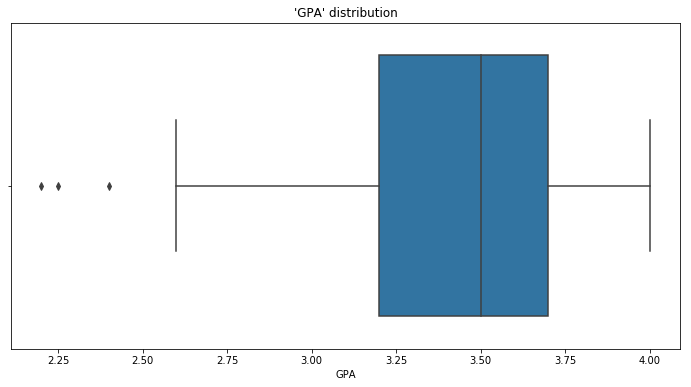

In [81]:
# Boxplot to visualize and check results
fig, ax = plt.subplots(figsize=[12,6])
sns.boxplot(df['GPA'])
ax.set_title("'GPA' distribution")

### 'weight' feature

In this case we will fill missing values dependent on gender.

In [82]:
# Some strings, blended and missing values.
df['weight'].unique()

array(['187', '155', "I'm not answering this. ", 'Not sure, 240', '190',
       '180', '137', '125', '116', '110', '264', '123', '185', '145',
       '170', '135', '165', '175', '195', '105', '160', '167', '115',
       '205', nan, '128', '150', '140', '120', '100', '113', '168', '169',
       '200', '265', '192', '118', '210', '112', '144 lbs', '130', '127',
       '129', '260', '184', '230', '138', '156'], dtype=object)

In [83]:
# Clean blended values, non-numeric become NaN.
df['weight'] = df['weight'].str.replace(r'[^\d\d\d]', '').replace('', np.nan).astype(float)

In [84]:
df['weight'].unique()

array([187., 155.,  nan, 240., 190., 180., 137., 125., 116., 110., 264.,
       123., 185., 145., 170., 135., 165., 175., 195., 105., 160., 167.,
       115., 205., 128., 150., 140., 120., 100., 113., 168., 169., 200.,
       265., 192., 118., 210., 112., 144., 130., 127., 129., 260., 184.,
       230., 138., 156.])

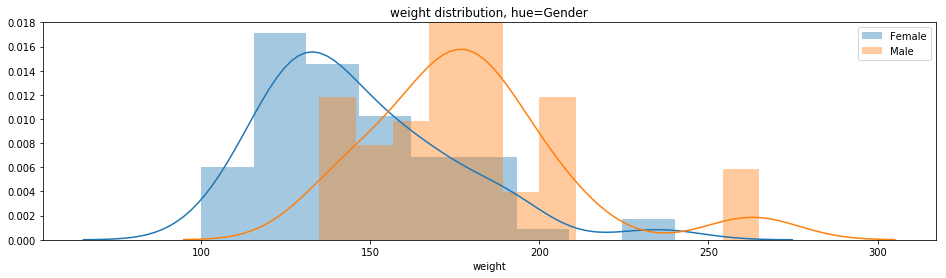

In [85]:
# Let's create temporary data frame for plotting.
x = pd.DataFrame({'Gender': df['Gender'], 'weight': df['weight']})

# Drop all NaN.
x.dropna(inplace=True)
x.reset_index(drop=True)

# Dict contains mean values of weights for both genders.
weight_mean = {}

# Set plot size.
fig, ax = plt.subplots(figsize=[16,4])

# Create two distributions for both genders.
for gen, frame in x.groupby('Gender'):
    weight_mean[gen] = frame['weight'].values.mean()
    sex_dict = {1: 0, 2: 1}
    sns.distplot(frame['weight'], ax=ax, label=['Female', 'Male'][sex_dict[gen]])

ax.set_title('weight distribution, hue=Gender')
ax.legend()

In [86]:
# Let's check rows with NaN weight values. 
df[df['weight'].isnull()]

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,cook,comfort_food_reasons,cuisine,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,eating_changes_coded1,eating_out,employment,ethnic_food,exercise,father_education,father_profession,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,fruit_day,grade_level,greek_food,healthy_feeling,healthy_meal,ideal_diet,ideal_diet_coded,income,indian_food,italian_food,life_rewarding,marital_status,meals_dinner_friend,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
2,3.30,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food",1.0,1,3.0,"toast and fruit for breakfast, salad for lunch...",3,1.0,sometimes choosing to eat fast food instead of...,1,3,2,3.0,5,2.0,2.0,owns business,italian,1,3.0,"mac and cheese, pizza, tacos",1,5,3,5,6,usually includes natural ingredients; nonproce...,i would say my ideal diet is my current diet,6,6.0,5,5,7.0,2.0,"chicken and rice with veggies, pasta, some kin...",2.0,owns business,4,2.0,1,3,5.0,6.0,1.0,2.0,5,1165.0,500,none,5,1,900,NaN
32,3.40,2,1,610,3.0,315.0,2,"Grandma's Chinese, Peruvian food from back hom...",5.0,4,NaN,"Not that balanced, but I try not to eat fatty ...",2,2.0,I eat more junk food now.,1,3,3,2.0,5,NaN,5.0,Lawyer,Spanish,2,NaN,"Spaghetti, Chicken, Won Tons",1,4,4,5,5,Plenty of greens and lean proteins,"Plenty of protein, carbs from vegetables and f...",7,5.0,5,5,8.0,1.0,"Pasta,Sushi,Steak",5.0,Lawyer,4,1.0,3,4,5.0,4.0,1.0,1.0,5,580.0,345,Soccer,5,1,760,NaN
74,2.71,2,2,265,2.0,420.0,1,NaN,2.0,9,4.0,NaN,4,2.0,NaN,3,4,1,3.0,3,2.0,1.0,retire,NaN,0,2.0,NaN,1,4,3,3,8,NaN,NaN,8,3.0,3,3,10.0,4.0,"rice and Chicken, sea food",1.0,NaN,2,2.0,3,5,3.0,3.0,1.0,2.0,3,580.0,345,NaN,4,2,760,NaN


In [87]:
# Let's check how many NaN's these 3 rows have.
inv_data = {}

for index, row in df[df['weight'].isnull()].iterrows():
    # Variable for printing results and getting # of NaNs.
    temp = row.isnull().value_counts()
    print(temp)
    
    # Adds to dict 3 values by data frame's index - actual value, # of row's NaNs, gender.
    inv_data[str(index)] = (row['weight'], temp.values[1], row['Gender'])        

False    58
True      1
Name: 2, dtype: int64
False    55
True      4
Name: 32, dtype: int64
False    49
True     10
Name: 74, dtype: int64


Row with 74th index will be dropped. The rest NaNs will be filled with mean value dependent on gender.

In [88]:
for df_index, tuple_ in inv_data.items():
    # Row with # of NaNs > 10 will be dropped.
    if tuple_[1] > 10:
        df.drop(int(df_index), inplace=True)
    # Weight's NaN will be replaced with mean value.
    else:
        # weight_mean is a dict with items() -> (gender, mean weight value)
        df['weight'].values[int(df_index)] = weight_mean[tuple_[2]]

In [89]:
# Finally we can change column dtype.
df['weight'] = df['weight'].astype(int)

to be continued..